# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

df=pd.DataFrame(cities)
df=df.rename(columns={0: 'city'})
df.head()

,city
0,levittown
1,yellowknife
2,hithadhoo
3,savinka
4,ushuaia


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create new columns for data we'll be collecting from the API
df['temp']=""
df['max temp']=""
df['humidity']=""
df['cloudiness']=""
df['wind speed']=""
df['lat']=""
df['lon']=""
df['city country']=""
df['city datetime']=""

#Iterate over each row
for index, row in df.iterrows():
    city = row['city']
    print(f"Processing Record {index + 1} | {city}")
    city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + api_key
    
    weather = requests.get(url).json()
    try:
        df.loc[index, 'temp'] = weather['main']['temp']
        df.loc[index, 'max temp'] = weather['main']['temp_max']
        df.loc[index, 'humidity'] = weather['main']['humidity']
        df.loc[index, 'wind speed'] = weather['wind']['speed']
        df.loc[index, 'cloudiness'] = weather['clouds']['all']
        df.loc[index, 'city country'] = weather['sys']['country']
        df.loc[index, 'city datetime'] = weather['dt']
        df.loc[index, 'lat'] = weather['coord']['lat']
        df.loc[index, 'lon'] = weather['coord']['lon']
    except Exception:
        df.loc[index, 'temp'] = 'city not found'
        df.loc[index, 'max temp'] = 'city not found'
        df.loc[index, 'humidity'] = 'city not found'
        df.loc[index, 'wind speed'] = 'city not found'
        df.loc[index, 'cloudiness'] = 'city not found'
        df.loc[index, 'city country'] = 'city not found'
        df.loc[index, 'city datetime'] = 'city not found'
        df.loc[index, 'lat'] = 'city not found'
        df.loc[index, 'lon'] = 'city not found'
        
        print("City not found. Skipping...")
    time.sleep(.50)
    
print("--------------------_--")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 | levittown
Processing Record 2 | yellowknife
Processing Record 3 | hithadhoo
Processing Record 4 | savinka
Processing Record 5 | ushuaia
Processing Record 6 | constitucion
Processing Record 7 | mataura
Processing Record 8 | sentyabrskiy
City not found. Skipping...
Processing Record 9 | udachnyy
Processing Record 10 | tiksi
Processing Record 11 | tuatapere
Processing Record 12 | kapit
Processing Record 13 | kaitangata
Processing Record 14 | mahebourg
Processing Record 15 | saldanha
Processing Record 16 | bur gabo
Processing Record 17 | rikitea
Processing Record 18 | svetlyy
City not found. Skipping...
Processing Record 19 | faya
Processing Record 20 | fortuna
Processing Record 21 | gimli
Processing Record 22 | broken hill
City not found. Skipping...
Processing Record 23 | kahului
Processing Record 24 | mar del plata
Processing Record 25 | norman wells
Processing Record 26 | butaritari
Processing Record 27 | dikson
Processing Record 28 | puerto ayora
Processing Recor

Processing Record 231 | bauchi
Processing Record 232 | homer
Processing Record 233 | lac du bonnet
Processing Record 234 | itarema
Processing Record 235 | laguna
Processing Record 236 | nakamura
Processing Record 237 | flagstaff
Processing Record 238 | berehomet
Processing Record 239 | alofi
Processing Record 240 | krasnoselkup
City not found. Skipping...
Processing Record 241 | madimba
Processing Record 242 | praia da vitoria
Processing Record 243 | tasiilaq
Processing Record 244 | kendari
Processing Record 245 | ancud
Processing Record 246 | cozumel
City not found. Skipping...
Processing Record 247 | dno
Processing Record 248 | jieshi
Processing Record 249 | carai
Processing Record 250 | olinda
Processing Record 251 | adelaide
Processing Record 252 | stromness
Processing Record 253 | miracema do tocantins
Processing Record 254 | kirkuk
Processing Record 255 | jurado
City not found. Skipping...
Processing Record 256 | naze
Processing Record 257 | villaviciosa
Processing Record 258 | p

Processing Record 452 | palmer
Processing Record 453 | yusva
City not found. Skipping...
Processing Record 454 | dudinka
Processing Record 455 | isla vista
Processing Record 456 | upernavik
Processing Record 457 | san dionisio del mar
Processing Record 458 | chippewa falls
Processing Record 459 | odesa
Processing Record 460 | williams lake
Processing Record 461 | torbay
Processing Record 462 | aubenas
Processing Record 463 | nazca
Processing Record 464 | skelleftea
Processing Record 465 | vanavara
Processing Record 466 | nishihara
Processing Record 467 | ahipara
Processing Record 468 | rawson
Processing Record 469 | aswan
Processing Record 470 | skibbereen
Processing Record 471 | murdochville
Processing Record 472 | bogorodskoye
Processing Record 473 | belmonte
Processing Record 474 | aasiaat
Processing Record 475 | gizycko
Processing Record 476 | phek
Processing Record 477 | vao
Processing Record 478 | pathein
Processing Record 479 | port blair
Processing Record 480 | vanimo
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
df = df[df.temp!='city not found']

export_csv = df.to_csv("cities.csv")
#export_csv=df.to_csv(r'C:\Users\paula\Desktop\python-api-challenge\WeatherPy\cities.csv')
df.count()
df.head()                     

,city,temp,max temp,humidity,cloudiness,wind speed,lat,lon,city country,city datetime
0,levittown,48.38,55.4,100,1,6.04,40.15,-74.84,US,1571882317
1,yellowknife,30.07,30.2,86,90,11.41,62.45,-114.38,CA,1571882317
2,hithadhoo,76.42,76.42,86,100,12.33,-0.6,73.08,MV,1571882318
3,savinka,56.46,56.46,79,77,6.38,50.08,47.1,RU,1571882319
4,ushuaia,55.4,55.4,54,40,8.05,-54.81,-68.31,AR,1571882035


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

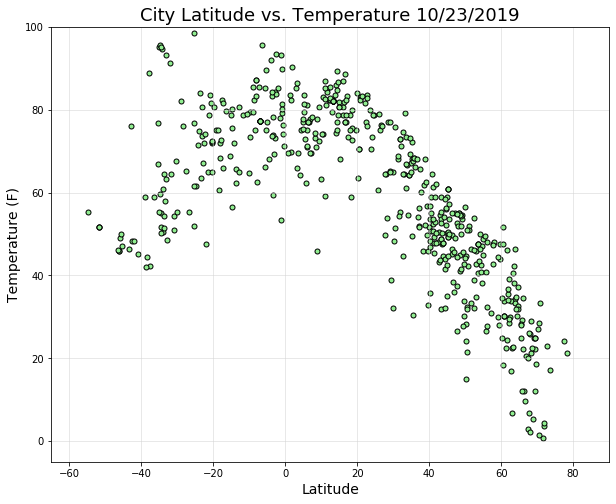

In [10]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['temp'], s=25, edgecolor = 'black', facecolor= 'lightgreen')
plt.title(f"City Latitude vs. Temperature {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Temperature (F)", fontsize="14")
plt.grid(True, linewidth = .5, color = 'lightgrey')
plt.ylim(-5,100)
plt.xlim(-65,90)

# Save the Figure
plt.savefig('Latitude_vs_Temp.png') 

# Show the Figure
plt.show()


#### Latitude vs. Humidity Plot

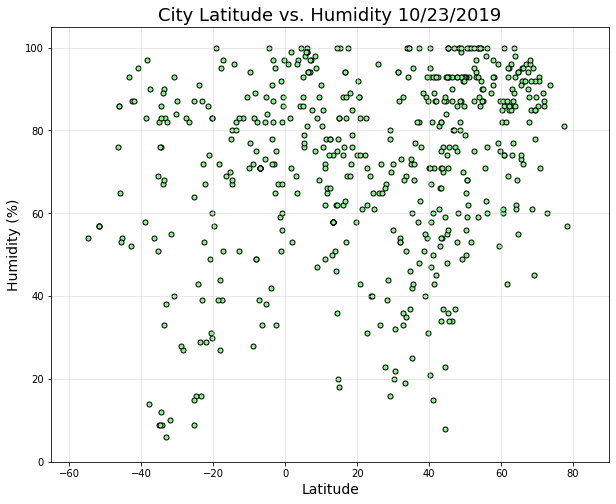

In [11]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['humidity'], s=25, edgecolor = 'black', facecolor= 'lightgreen')
plt.title(f"City Latitude vs. Humidity {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Humidity (%)", fontsize="14")
plt.grid(True, linewidth = .5, color = 'lightgrey')
plt.ylim(0,105)
plt.xlim(-65,90)

# Save the Figure
plt.savefig('Latitude_vs_Humidity.png') 

# Show the Figure
plt.show()


#### Latitude vs. Cloudiness Plot

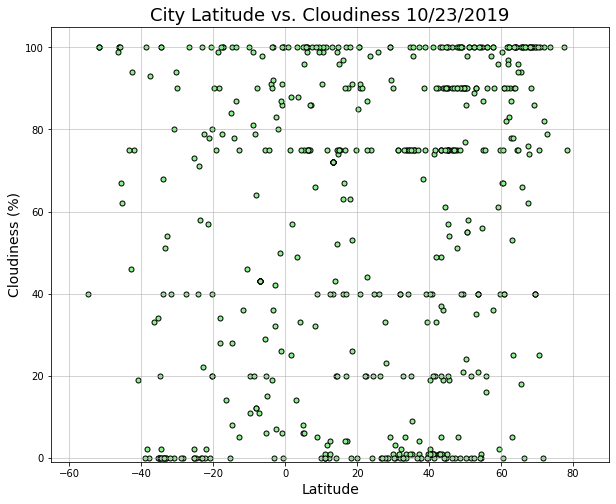

In [12]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['cloudiness'], s=25, edgecolor = 'black', facecolor= 'lightgreen')
plt.title(f"City Latitude vs. Cloudiness {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Cloudiness (%)", fontsize="14")
plt.grid(True, linewidth = .5, color = 'darkgrey')
plt.ylim(-1,105)
plt.xlim(-65,90)

# Save the Figure
plt.savefig('Latitude_vs_Cloudiness.png') 

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

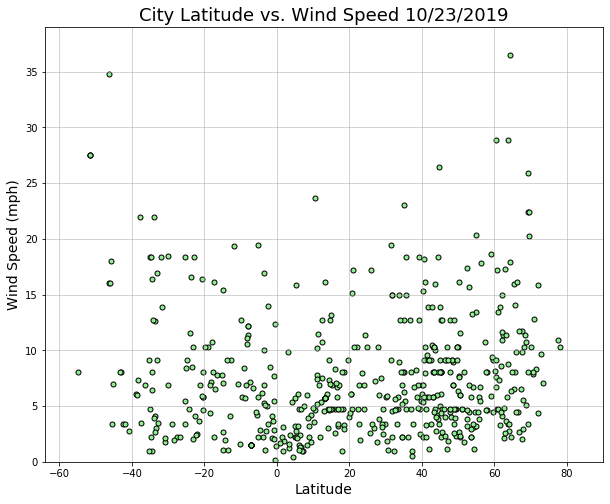

In [13]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['wind speed'], s=25, edgecolor = 'black', facecolor= 'lightgreen')
plt.title(f"City Latitude vs. Wind Speed {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")
plt.grid(True, linewidth = .5, color = 'darkgrey')
plt.ylim(0,39)
plt.xlim(-64,90)

# Save the Figure
plt.savefig('Latitude_vs_WindSpeed.png') 

# Show the Figure
plt.show()